# Keras: CV using deep NN

**Content**: 
- Multi classification by 3 layers classic NN for MNIST handwritten digit dataset

**Note**: This is to run on colab 


## 1. The Network

Raw values of every pixel are used as reatures to input to the network. 
<br>The images are matrices of size 28×28. 
<br> So, this requires to reshape the image matrix to an array of size 784 ( 28*28 ) and feed this array to the network. 
<br> It uses the network with 2 hidden layers having 512 neurons each
<br>The output layer has 10 layers for the 10 digits. A schematic diagram is shown below.

<img src="supplementary_data/mlp-mnist-schematic.jpeg" align = 'left' style="width:400;height:400px;"> 


In [3]:
!wget https://www.dropbox.com/s/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg?dl=0 -O mlp-mnist-schematic.jpeg



--2024-02-04 22:17:57--  https://www.dropbox.com/s/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg [following]
--2024-02-04 22:17:57--  https://www.dropbox.com/s/raw/6w39pme4spqbj9e/mlp-mnist-schematic.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44375b98aadc2b42c0bbc0ac74.dl.dropboxusercontent.com/cd/0/inline/CMoapGDUJQcIx8O2q0z2mlgIICGjwhm5QGj1L9_ZXdhIrrm9X-zZ8v55qhewYlHK6y0LYfyqil19nIW1dhIAr_ieCnYvxJ5OwVn9gRSC-Zl-rf1xfBPDwWhGAPvH7f3731jZfklftsOjIwcPrco8pCig/file# [following]
--2024-02-04 22:17:57--  https://uc44375b98aadc2b42c0bbc0ac74.dl.dropboxusercontent.com/cd/0/inline/CMoapGDUJQcIx8O2q0z2mlgIICGjwhm5QGj1L9_ZXdhIrrm9X-zZ8v55qhewYlHK6y0LYfyqil19nIW1dhIAr_i

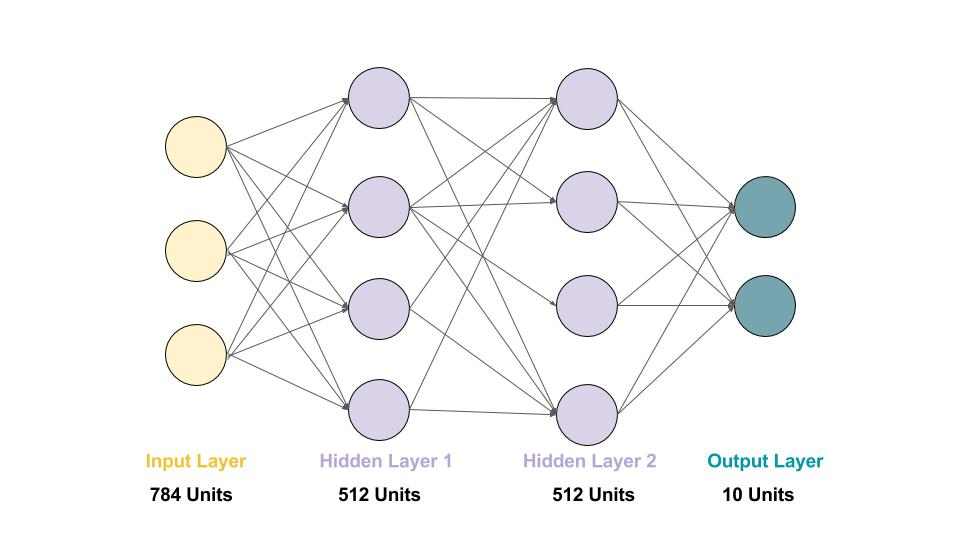

In [4]:
from IPython.display import Image
Image('mlp-mnist-schematic.jpeg')

## 2. Load the Data

MNIST is a commonly used handwritten digit dataset consisting of 60,000 images in the training set and 10,000 images in the test set. 

So, each of 10 digit has 6000 images in the training set. 

The digits are size-normalized and centered in a fixed-size ( 28×28 ) image.

Keras comes with the MNIST data loader. 

It has a function `mnist.load_data()` which downloads the data from its servers if it is not present on your computer. 

The data loaded using this function is divided into training and test sets. This is done by the following :


In [5]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test)  = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


### Review the data 



In [6]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
# %matplotlib inline 

In [8]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')


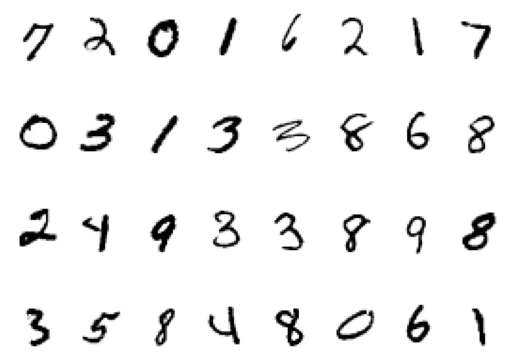

In [9]:
plt.figure()

X_grid= X_train.reshape([-1, 28, 28])
display_samples_in_grid(X_grid, n_rows=4, n_cols=8)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

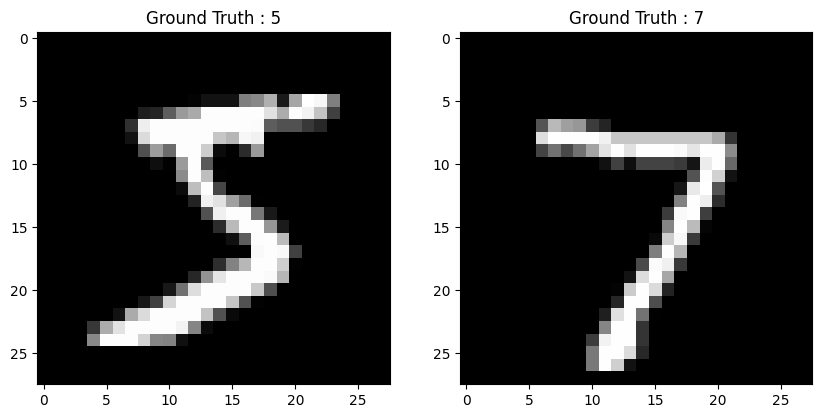

In [10]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## 4. Process the data

1. Convert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [11]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(X_train.shape[1:])
X_train = X_train.reshape(X_train.shape[0], dimData) # think could be just -1 
X_test = X_test.reshape(X_test.shape[0], dimData)

2. Convert the data to float and scale the values between 0 to 1.

Note sure why it is important to convert first. Even though originally it is numpy.uint8 (just check `type(train_data[0][0])`) 

In [12]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

3. Convert the **labels** from integer to categorical ( one-hot ) encoding since that is the format **required by Keras** to perform multiclass classification. 

One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.
For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [13]:
from tensorflow.keras.utils import to_categorical
# Change the labels from integer to categorical data
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)
 
# Display the change for category label using one-hot encoding
print('Original label [0] : ', Y_train[0])
print('After conversion to categorical ( one-hot ) : ', Y_train_one_hot[0])

Original label [0] :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 5.1. Create the model 

- The input to the network is the 784-dimensional array converted from the 28×28 image
- 2 hidden layers 
- The number of units in the hidden layers are 512. 
- Output layer has 10 units. 
- sequential model is used for building the network. 
- It contains `Dense` layer, (also called fully connected layer since all the neurons from one layer are connected to the neurons in the previous layer). 
- Apart from the `Dense` layer, the ReLU activation function is added, which is required to introduce **non-linearity** to the model. 
- The last layer is a `softmax` layer as it is a multiclass classification problem. (For binary classification, we can use sigmoid instead)


In [14]:
from keras.models import Sequential
from keras.layers import Dense
import keras
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [16]:
class MyModel(keras.Model):
    def __init__(self, nClasses):
        super().__init__()
        self.dense1 = Dense(512, activation="relu")
        self.dense2 = Dense(512, activation="relu")
        self.classify = Dense(nClasses, activation='softmax')
        
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classify(x)

model = MyModel(nClasses)

## 5.2. Configure the model 

- Optimizer is `rmsprop`. 
- Loss type is `categorical cross entropy` which is used for multiclass classification. 
- Metrics is `accuracy`

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 5.3. Train the model
- Specify the **number of epochs as 20** (the whole dataset will be fed to the network 20 times)
- Use **test data** for validation

In [18]:
history = model.fit(X_train, Y_train_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(X_test, Y_test_one_hot))

Epoch 1/20




235/235 [==============================] - 5s 17ms/step - loss: 0.2886 - accuracy: 0.9112 - val_loss: 0.1124 - val_accuracy: 0.9646
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1006 - accuracy: 0.9690 - val_loss: 0.0898 - val_accuracy: 0.9728
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0640 - accuracy: 0.9798 - val_loss: 0.1041 - val_accuracy: 0.9673
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0627 - val_accuracy: 0.9799
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0695 - val_accuracy: 0.9781
Epoch 6/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0616 - val_accuracy: 0.9820
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0611 - val_accuracy: 0.9825
Epoch 8/

## 5.4. Evaluate the trained model


In [19]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9846
Evaluation result on Test Data : Loss = 0.07414601743221283, accuracy = 0.9846000075340271


## 6. Check for Overfitting

The `fit()` function returns a history object which has a **dictionary of all the metrics** which are required to track during training.

Use the data in the history object to plot the loss and accuracy curves to check how the training process went.

Use the `history.history.keys()` function to check what metrics are present in the history. It should look like the following

`[‘acc’, ‘loss’, ‘val_acc’, ‘val_loss’]`




In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy Curves')

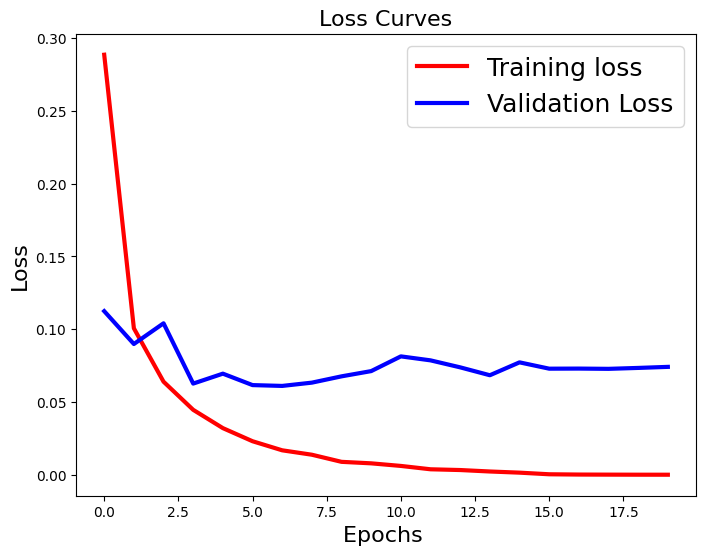

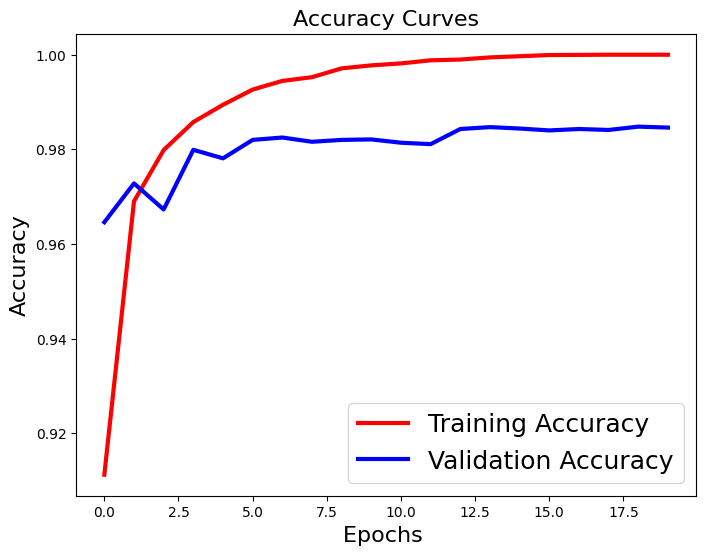

In [21]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Although the accuracy obtained above is very good, it may be worse in other cases, e.g. like on the image below


--2024-02-04 22:29:44--  https://www.dropbox.com/s/383h2801culc8al/overfit.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/383h2801culc8al/overfit.png [following]
--2024-02-04 22:29:45--  https://www.dropbox.com/s/raw/383h2801culc8al/overfit.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc65fd50eb8938706d21069ede2b.dl.dropboxusercontent.com/cd/0/inline/CMoCs1lPHv40eSHC_O-H4wc_q4CP15n39P5eMVMwa8E_Gy1qq6kzXG0pzZTO-T7WXl87mQtpqEi6f2KychCtgOPDuDQN19Y9SCHsep6v4XU2H8c5MIBlrlfQvL_KsEkJDj7BC5HrdxxbYkS9We8Fv4Ft/file# [following]
--2024-02-04 22:29:45--  https://uc65fd50eb8938706d21069ede2b.dl.dropboxusercontent.com/cd/0/inline/CMoCs1lPHv40eSHC_O-H4wc_q4CP15n39P5eMVMwa8E_Gy1qq6kzXG0pzZTO-T7WXl87mQtpqEi6f2KychCtgOPDuDQN19Y9SCHsep6v4XU2H8c5MIBlrlfQvL_KsE

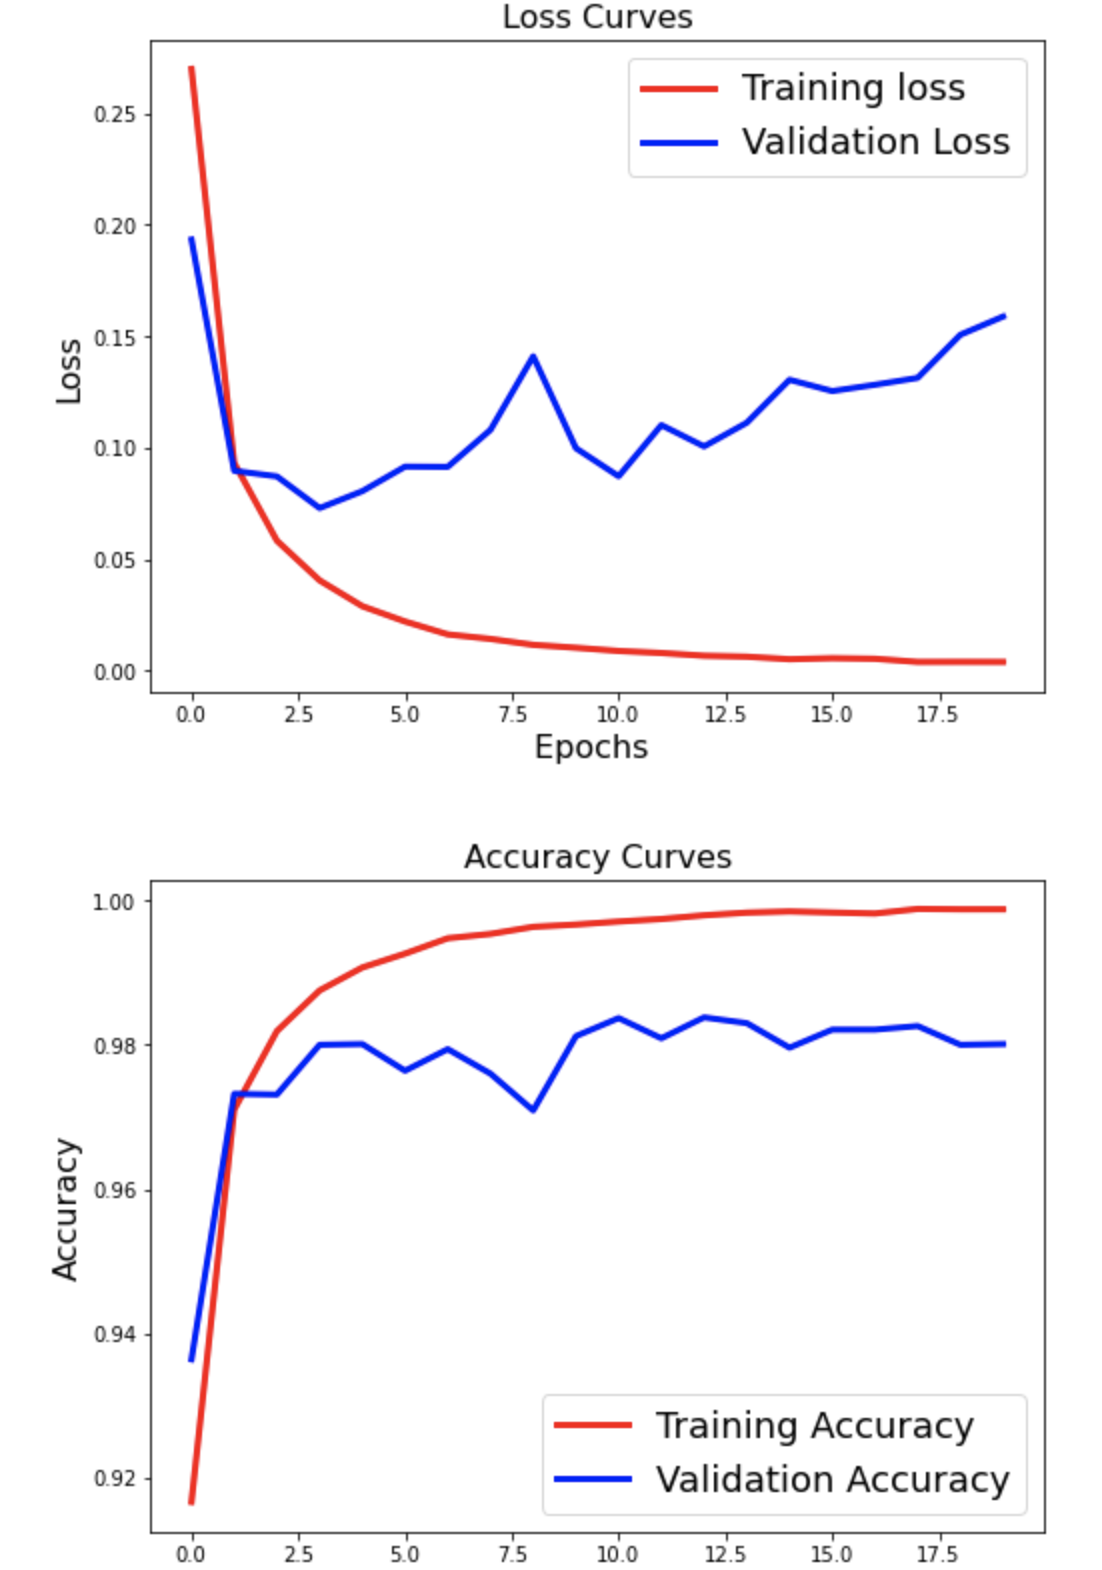

In [23]:
!wget https://www.dropbox.com/s/383h2801culc8al/overfit.png?dl=0 -O overfit.png
from IPython.display import Image
Image('overfit.png', width = 500, height = 800)



In this case the validation loss initially decrease, but then it starts **increasing gradually**. 

Also, there is a substantial difference between the training and test accuracy. 

This is a clear sign of **Overfitting** which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data. 

## 7. Add Regularization to the model

Overfitting occurs mainly because the network parameters are getting too biased towards the training data. 

Add a `dropout layer` to overcome this problem to a certain extent. 

In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.

In [24]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

## 8. Check performance after regularization
Train the network again in the same way and check the loss and accuracy curves.

Epoch 1/20


235/235 [==============================] - 6s 21ms/step - loss: 0.3892 - accuracy: 0.8792 - val_loss: 0.1445 - val_accuracy: 0.9530
Epoch 2/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1727 - accuracy: 0.9481 - val_loss: 0.1122 - val_accuracy: 0.9644
Epoch 3/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1333 - accuracy: 0.9596 - val_loss: 0.0835 - val_accuracy: 0.9740
Epoch 4/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.0785 - val_accuracy: 0.9769
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0964 - accuracy: 0.9702 - val_loss: 0.0767 - val_accuracy: 0.9768
Epoch 6/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0877 - accuracy: 0.9737 - val_loss: 0.0679 - val_accuracy: 0.9795
Epoch 7/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0788 - accuracy: 0.9758 - val_loss: 0.0639 - val_accuracy: 0.9814
Epoch 8/20

Text(0.5, 1.0, 'Accuracy Curves')

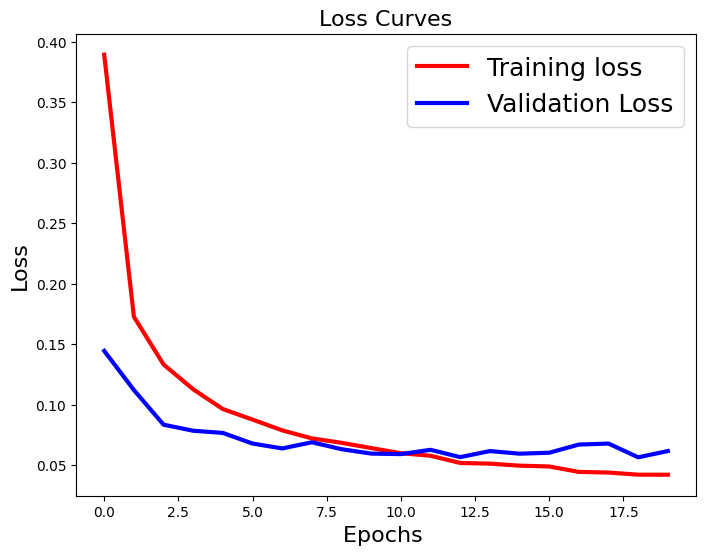

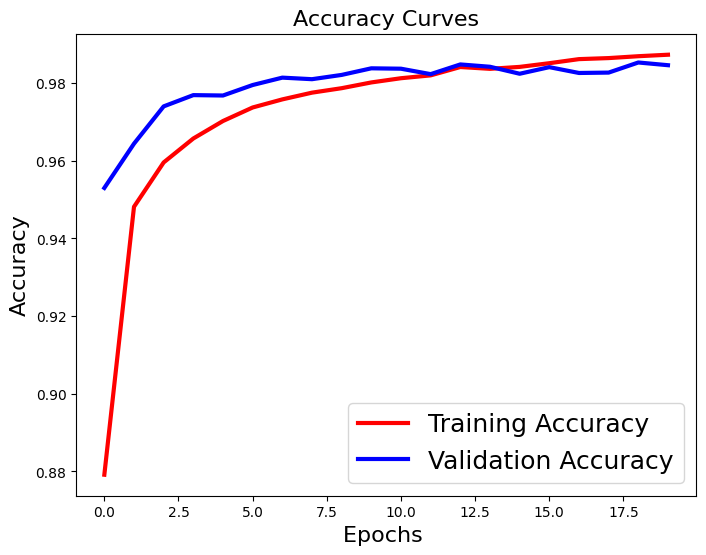

In [25]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(X_train, Y_train_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(X_test, Y_test_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From the above loss and accuracy curves, we can observe that
- The validation loss is not increasing
- The difference between the train and validation accuracy is not very high

Thus, we can say that the model has better generalization capability as the performance does not decrease drastically in case of unseen data also.

In [26]:
[test_loss, test_acc] = model_reg.evaluate(X_test, Y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9846
Evaluation result on Test Data : Loss = 0.06172460317611694, accuracy = 0.9846000075340271


## Inference

In [27]:
predict_x=model_reg.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
# Predict single image 
i=0
predict_x=model_reg.predict(X_test[i,:].reshape(1, -1)) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 37ms/step


In [29]:
classes_x

array([7], dtype=int64)

## Additional features

Keras also contain similar dataset abstraction as PyTorch called `keras.utils.Sequence` that allows to create custom dataset collection via implementation of the `__getitem__` and `__len__` methods.

In [30]:
from keras.utils import Sequence

In [32]:
from PIL import Image
from PIL import ImageOps
import numpy as np
import math

# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class CIFAR10Sequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        low = idx * self.batch_size
        # Cap upper bound at array length; the last batch may be smaller
        # if the total number of items is not a multiple of batch size.
        high = min(low + self.batch_size, len(self.x))
        batch_x = self.x[low:high]
        batch_y = self.y[low:high]

        return np.array([
            np.array(ImageOps.fit(Image.open(file_name), (32, 32), Image.ANTIALIAS))
               for file_name in batch_x]), np.array(batch_y)

Also, Keras from version 3 allows to use different frameworks as backend, such as PyTorch, Jax, etc.

In [33]:
import os
# os.environ["KERAS_BACKEND"] = "jax"
os.environ["KERAS_BACKEND"] = "torch"

import keras

And it's possible to use custom optimization loop - training and evaluation steps, similar to PyTorch.

In [35]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np

In [38]:
class CustomModel(keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compute_loss(y=y, y_pred=y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update metrics (includes the metric that tracks the loss)
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)

        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        # Unpack the data
        x, y = data
        # Compute predictions
        y_pred = self(x, training=False)
        # Updates the metrics tracking the loss
        loss = self.compute_loss(y=y, y_pred=y_pred)
        # Update the metrics.
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}


In [39]:
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Just use `fit` as usual
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=3)


Epoch 1/3
32/32 [==============================] - 1s 3ms/step - loss: 0.2124
Epoch 2/3
32/32 [==============================] - 0s 3ms/step - loss: 0.1991
Epoch 3/3
32/32 [==============================] - 0s 2ms/step - loss: 0.1871


In [42]:
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1686


0.16863049566745758

## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [43]:
!wget https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0 -O train_signs.h5
!wget https://www.dropbox.com/s/1doojr76evzroet/test_signs.h5?dl=0 -O test_signs.h5


--2024-02-04 22:39:54--  https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f33ym46utiwdvy4/train_signs.h5 [following]
--2024-02-04 22:39:55--  https://www.dropbox.com/s/raw/f33ym46utiwdvy4/train_signs.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd20e09e29cb94d15dc6e8016f7.dl.dropboxusercontent.com/cd/0/inline/CMrrmczCgLLseGbZRVABPZqiygZULFt9ognSziCFf260YifgKqUYAqTi4UhfRHKcjlYlJKrct5zw0GdfaNnLSTUFWsrTpPjrPdKZuBwhUTG1J_5kXDOkE-HBEaCPj0zkkcaE8vcOWw_NTvk9C-rAiSVw/file# [following]
--2024-02-04 22:39:55--  https://ucd20e09e29cb94d15dc6e8016f7.dl.dropboxusercontent.com/cd/0/inline/CMrrmczCgLLseGbZRVABPZqiygZULFt9ognSziCFf260YifgKqUYAqTi4UhfRHKcjlYlJKrct5zw0GdfaNnLSTUFWsrTpPjrPdKZuBwhUTG1J_5kXDOkE

In [92]:

import h5py
def load_dataset():
    fn =   'train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


In [47]:
import tensorflow as tf

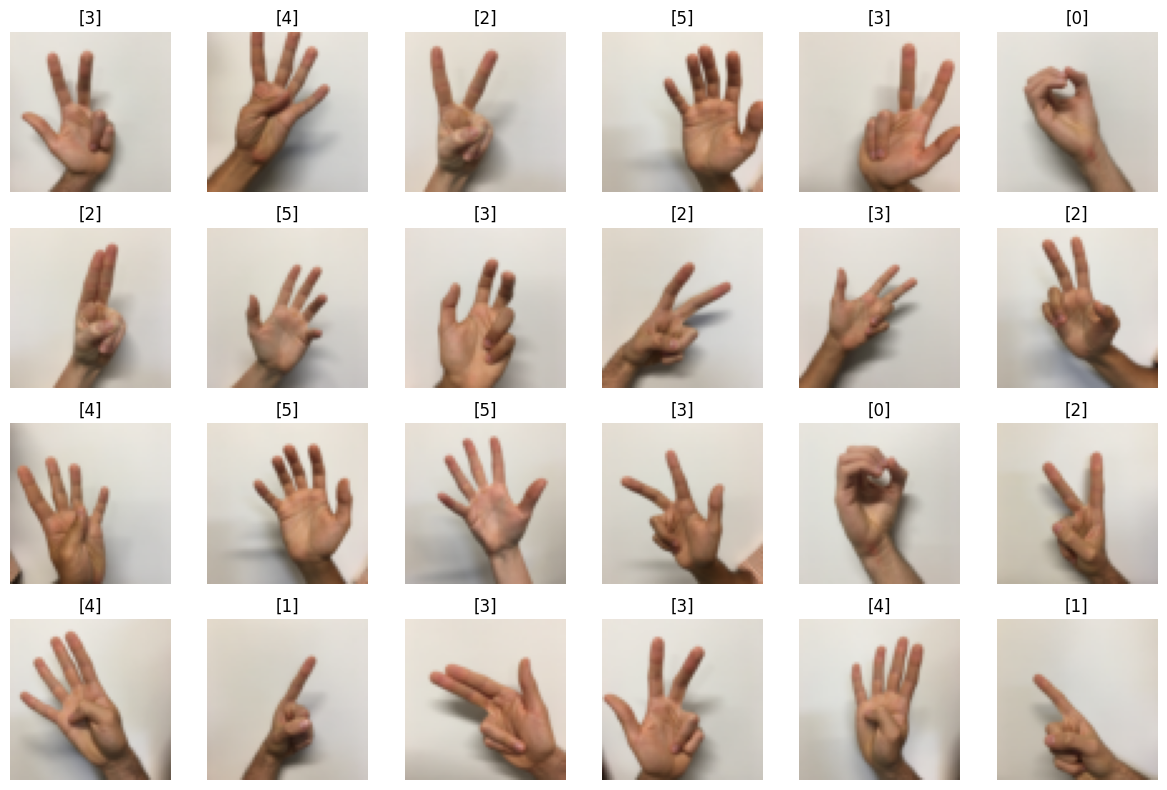

In [46]:
plt.figure(figsize= (12,8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y= train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

### Define and compile the model
#### Softmax activation function

The dropout layer's ratio was changed several times and the performance was checked during the homework completion.

In [134]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, (4,4), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 61, 61, 4)         68        
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 4)         0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 27, 27, 8)         520       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 flatten_28 (Flatten)        (None, 1352)              0         
                                                                 
 dense_72 (Dense)            (None, 256)             

In [128]:
# gray scale, convert from 3 channels to 1 channel
train_data = train_data.mean(axis=3).reshape(-1, 64, 64, 1)
test_data = test_data.mean(axis=3).reshape(-1, 64, 64, 1)

print("train_data.shape=", train_data.shape)
print("test_data.shape=", test_data.shape)

train_data.shape= (1080, 64, 64, 1)
test_data.shape= (120, 64, 64, 1)


In [135]:
history = model.fit(train_data, train_labels.T, epochs=30,
                    validation_data=(test_data, test_labels.T), batch_size=64)

Epoch 1/30
17/17 [==============================] - 2s 43ms/step - loss: 53.7163 - accuracy: 0.2139 - val_loss: 2.4708 - val_accuracy: 0.4583
Epoch 2/30
17/17 [==============================] - 0s 19ms/step - loss: 2.4252 - accuracy: 0.3667 - val_loss: 1.4692 - val_accuracy: 0.3833
Epoch 3/30
17/17 [==============================] - 0s 19ms/step - loss: 1.6799 - accuracy: 0.4278 - val_loss: 1.2349 - val_accuracy: 0.5250
Epoch 4/30
17/17 [==============================] - 0s 19ms/step - loss: 1.5566 - accuracy: 0.4704 - val_loss: 1.1685 - val_accuracy: 0.5667
Epoch 5/30
17/17 [==============================] - 0s 19ms/step - loss: 1.4042 - accuracy: 0.5046 - val_loss: 1.1164 - val_accuracy: 0.5583
Epoch 6/30
17/17 [==============================] - 0s 20ms/step - loss: 1.0955 - accuracy: 0.5963 - val_loss: 1.2122 - val_accuracy: 0.6083
Epoch 7/30
17/17 [==============================] - 0s 19ms/step - loss: 1.0183 - accuracy: 0.6583 - val_loss: 1.0336 - val_accuracy: 0.6583
Epoch 8/30
1

Text(0.5, 1.0, 'Accuracy Curves')

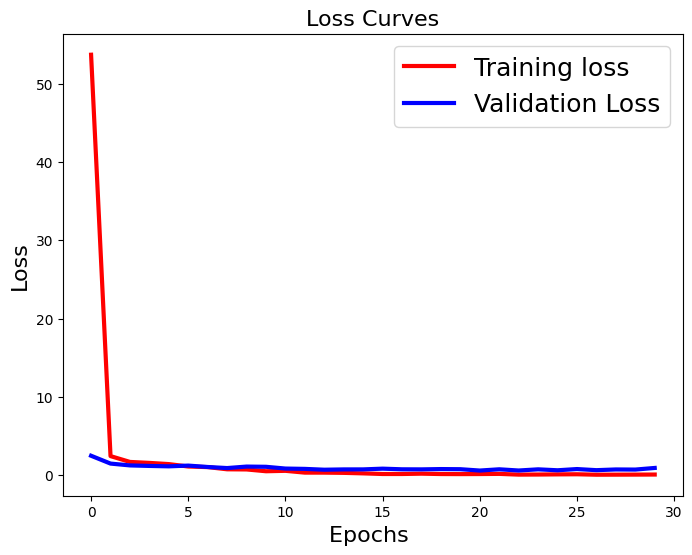

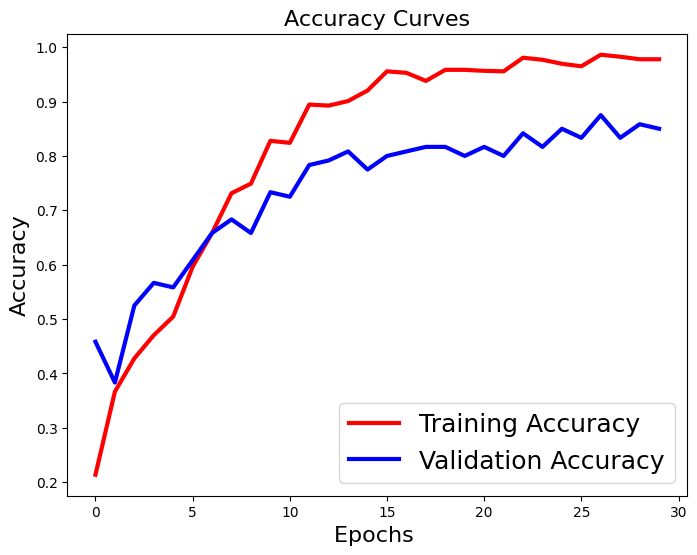

In [136]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Tanh activation

In [137]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, (4,4), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 61, 61, 4)         68        
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 4)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 27, 27, 8)         520       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 flatten_29 (Flatten)        (None, 1352)              0         
                                                                 
 dense_74 (Dense)            (None, 256)             

In [138]:
history = model.fit(train_data, train_labels.T, epochs=30,
                    validation_data=(test_data, test_labels.T), batch_size=64)

Epoch 1/30
17/17 [==============================] - 2s 42ms/step - loss: 5.0237 - accuracy: 0.2917 - val_loss: 1.3612 - val_accuracy: 0.5083
Epoch 2/30
17/17 [==============================] - 0s 21ms/step - loss: 1.2855 - accuracy: 0.5130 - val_loss: 1.1748 - val_accuracy: 0.5917
Epoch 3/30
17/17 [==============================] - 0s 21ms/step - loss: 0.9599 - accuracy: 0.6407 - val_loss: 0.9779 - val_accuracy: 0.6833
Epoch 4/30
17/17 [==============================] - 0s 20ms/step - loss: 0.8061 - accuracy: 0.6972 - val_loss: 0.8791 - val_accuracy: 0.6500
Epoch 5/30
17/17 [==============================] - 0s 20ms/step - loss: 0.5932 - accuracy: 0.7833 - val_loss: 0.8112 - val_accuracy: 0.7000
Epoch 6/30
17/17 [==============================] - 0s 19ms/step - loss: 0.4519 - accuracy: 0.8333 - val_loss: 0.8058 - val_accuracy: 0.7750
Epoch 7/30
17/17 [==============================] - 0s 20ms/step - loss: 0.3585 - accuracy: 0.8657 - val_loss: 0.7371 - val_accuracy: 0.7583
Epoch 8/30
17

Text(0.5, 1.0, 'Accuracy Curves')

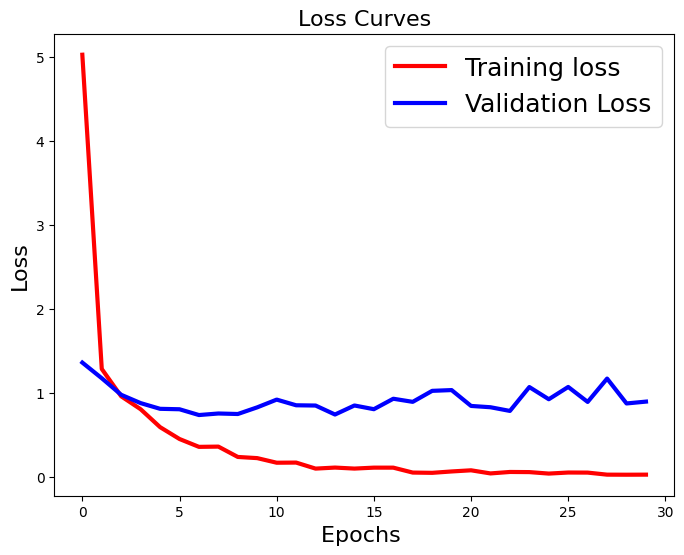

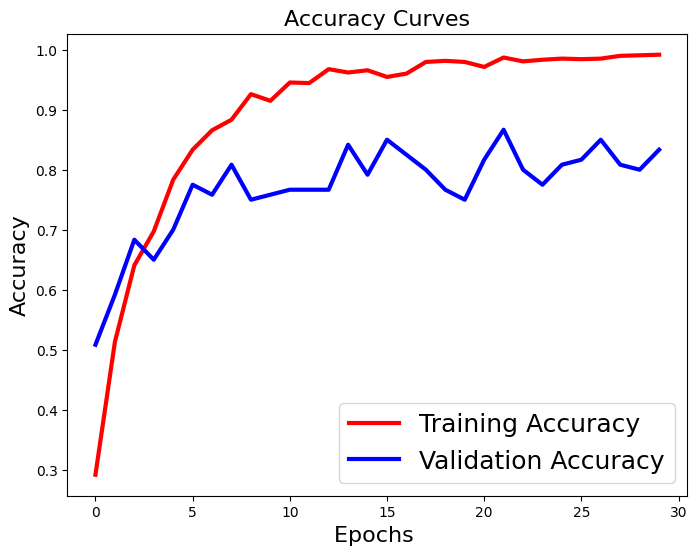

In [139]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# Source 
[Image Classification using Feedforward Neural Network in Keras](https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)

